In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import xgboost
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import os
%matplotlib inline


You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


# Data Analysis

**First Order Features**


* **Mean** : 
*Gives the contribution of individual pixel intensity for the entire image*
* **Variance** : 
*Used to find how each pixel varies from the neighbouring pixel* 
* **Standard Deviation** : 
*measures the deviation of measured Values or the data from its mean.*
* **Skewness** : 
*measures of symmetry, or more precisely, the lack of symmetry.* 
* **Kurtosis** : 
*describes the peakedness of e.g. a frequency distribution*

**Second Order Features** 


* **Contrast** : 
*the difference in luminance or colour across the image*
* **Energy** : 
*It's the rate of change in the color/brightness/magnitude of the pixels over local areas.*
* **ASM (Angular second moment)** : 
*is a measure of textural Uniformity of an image*
* **Entropy** : 
*is a statistical measure of randomness that can be used to characterize the texture of the image*
* **Homogeneity** :
*homogeneity expresses how similar certain elements (pixels) of the image are. *
* **Dissimilarity** : 
*is a numerical measure of how different two data objects are.*
* **Correlation** : 
*Correlation is the process of moving a filter mask often referred to as kernel over the image and computing the sum of products at each location(CNN alike)*
* **Coarseness** : 
*Describes the roughness/harshness of a texture*

**Labels**
* **Class** :  

**1 = Tumor**

**0 = Not Tumor**

In [2]:
data=pd.read_csv('/kaggle/input/brain-tumor/Brain Tumor.csv')
data

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


# Scaling

In [3]:
scalable=['Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness']


data[scalable]=StandardScaler().fit_transform(data[scalable])
data

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,-0.515700,-0.195790,-0.033144,0.504650,0.067855,-0.097267,-0.268050,0.685118,0.470073,0.404100,-0.121709,1.000713,-1.117857e-168
1,Image2,0,-0.129018,0.202943,0.365594,2.746050,-0.150204,-0.175881,-0.585492,2.090287,2.865580,1.345457,-0.799181,1.264377,-1.117857e-168
2,Image3,1,-0.375013,0.925765,0.984680,-1.026708,0.374531,0.037048,-0.421010,-1.335981,-0.988340,-1.649391,0.693704,0.850636,-1.117857e-168
3,Image4,1,-0.616481,0.531896,0.660820,-1.026561,0.615188,0.160202,0.212525,-1.335154,-0.988223,-1.840334,1.622995,0.322041,-1.117857e-168
4,Image5,0,-0.379529,0.039451,0.208352,1.041256,0.070489,-0.094103,0.429532,1.075849,1.022442,0.171115,1.154744,0.650854,-1.117857e-168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,2.050827,1.064921,1.092779,-0.139892,-0.789131,-0.349862,0.278359,0.123407,-0.170487,0.061596,0.277439,-0.183335,1.337288e-167
3758,Image3759,0,1.911290,1.104076,1.122668,-0.097345,-0.764704,-0.345702,0.303212,0.164116,-0.130150,0.183409,0.207915,-0.115377,1.337288e-167
3759,Image3760,0,1.488082,0.942399,0.997760,-0.074100,-0.700765,-0.333342,0.357754,0.187301,-0.106751,0.101766,0.219037,-0.137095,1.337288e-167
3760,Image3761,0,0.670746,0.501988,0.635006,0.203090,-0.534994,-0.294742,0.875475,0.439344,0.167517,0.006346,0.941273,-0.568517,1.337288e-167


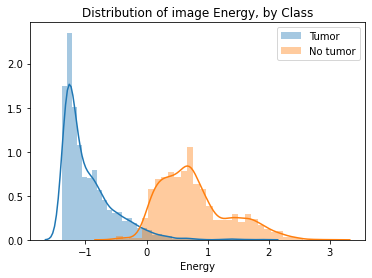

In [4]:
class1=data['Class']== 1
class0=data['Class']== 0
_data=data.copy()
_data=data.drop('Image',axis=1,inplace=False)
sns.distplot(a= _data[class1]['Energy'], label="Tumor")
sns.distplot(a = _data[class0]['Energy'], label="No tumor" )

plt.title("Distribution of image Energy, by Class")
plt.legend()


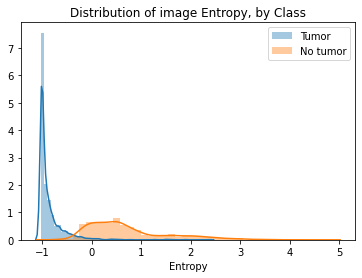

In [5]:
sns.distplot(a= _data[class1]['Entropy'], label="Tumor")
sns.distplot(a = _data[class0]['Entropy'], label="No tumor" )
plt.title("Distribution of image Entropy, by Class")
plt.legend()

In [17]:
y=data["Class"]
X = data[scalable]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=2)
print(y_test)

2955    0
3321    1
1851    0
1760    1
1002    0
       ..
692     1
2279    0
948     0
1654    1
594     1
Name: Class, Length: 1129, dtype: int64


# Most impactful features

In [26]:
model = xgboost.XGBClassifier() 
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9884853852967228

As the **previous graphs** suggested , the more ***un-uniform*** and ***un-structured*** the pixels values are,the more likely it is to have cancer

Thus,probably the best approach to take is some [Anomaly Detection](https://en.wikipedia.org/wiki/Anomaly_detection) algorithm


# Logistic Regression

In [21]:
logr= LogisticRegression(dual=False, verbose=1, random_state=  4)
logr.fit(X_train , y_train )
logr.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.9716563330380869

# Random Forest

In [23]:
RFclf = RandomForestClassifier(n_estimators = 2000, random_state= 4 ,verbose=1)
RFclf.fit( X_train, y_train  )
RFclf.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    9.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.4s finished


0.9858281665190434

# KNN

In [25]:
knn=KNeighborsClassifier( algorithm='auto' ,leaf_size= 50,n_neighbors= 5)
knn.fit(X_train,y_train )
knn.score ( X_test,y_test)

0.9813994685562445